In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [42]:
#### Importing the dataset

df = pd.read_csv('data/stud.csv')

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
df.shape

(1000, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


################Data checks:#################

 1. check duplicate values
 2. check missing values
 3. check data type
 4. check the number of values of each column
 5. check statistics of data set
 6. bcheck various categories present in the different categorical columns

In [46]:
### check missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [47]:
#### check duplicates

df.duplicated().sum()

np.int64(0)

In [48]:
### check null and dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
### check number of unique values of each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [50]:
### check statistics of dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Define numerical and categorical columns:

In [51]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print the columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features) )
print("We have {} categorical_features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


We need 'Total Score' and 'Average Score' for our calculation.
So we add those columns:

In [52]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average score'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [56]:
reading_full = df[df['reading_score']==100]['average score'].count()
writing_full = df[df['writing_score']==100]['average score'].count()
math_full = df[df['math_score']==100]['average score'].count()

print(f"number of students with full marks in maths: {math_full}")
print(f"number of students with full marks in writng: {writing_full}")
print(f"number of students with full marks in reading: {reading_full}")

number of students with full marks in maths: 7
number of students with full marks in writng: 14
number of students with full marks in reading: 17


In [57]:
reading_less_than_20 = df[df['reading_score']<=20]['average score'].count()
writing_less_than_20 = df[df['writing_score']<=20]['average score'].count()
math_less_than_20 = df[df['math_score']<=20]['average score'].count()

print(f"number of students with less than 20 marks in maths: {math_less_than_20}")
print(f"number of students with less than 20 marks in writing: {writing_less_than_20}")
print(f"number of students with less than 20 marks in reading: {reading_less_than_20}")

number of students with less than 20 marks in maths: 4
number of students with less than 20 marks in writing: 3
number of students with less than 20 marks in reading: 1


Exploring Data:

Visualize average score distribution to make some conclusion
1. Histogram
2. KDE

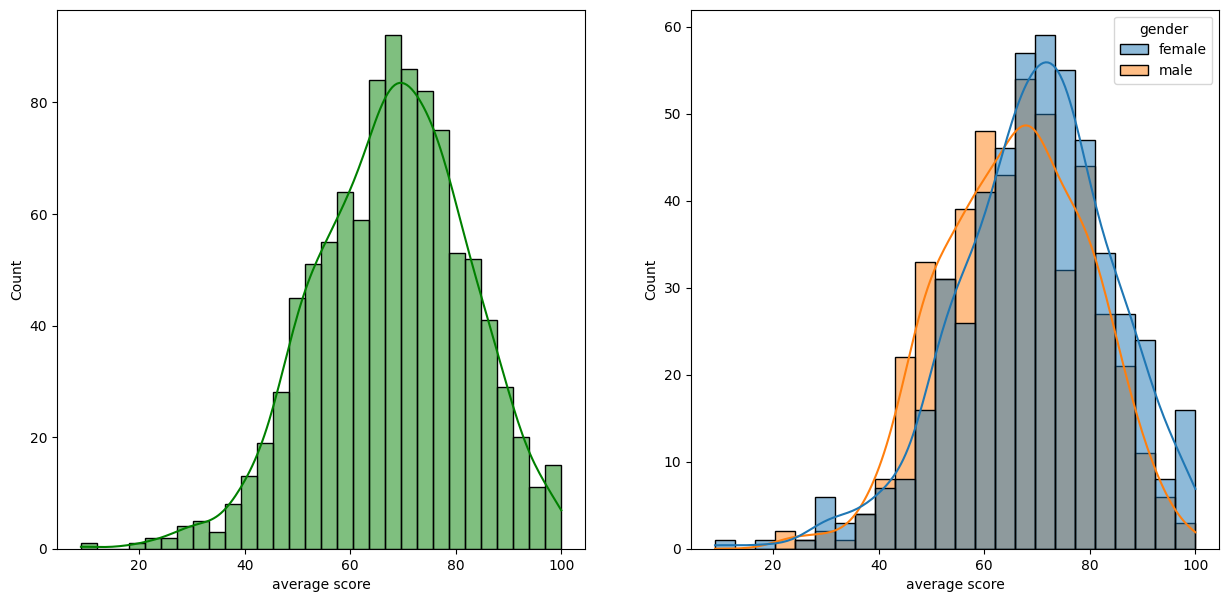

In [68]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))

sns.histplot(data=df, x='average score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average score', kde=True, hue='gender', ax=axs[1])

plt.show()


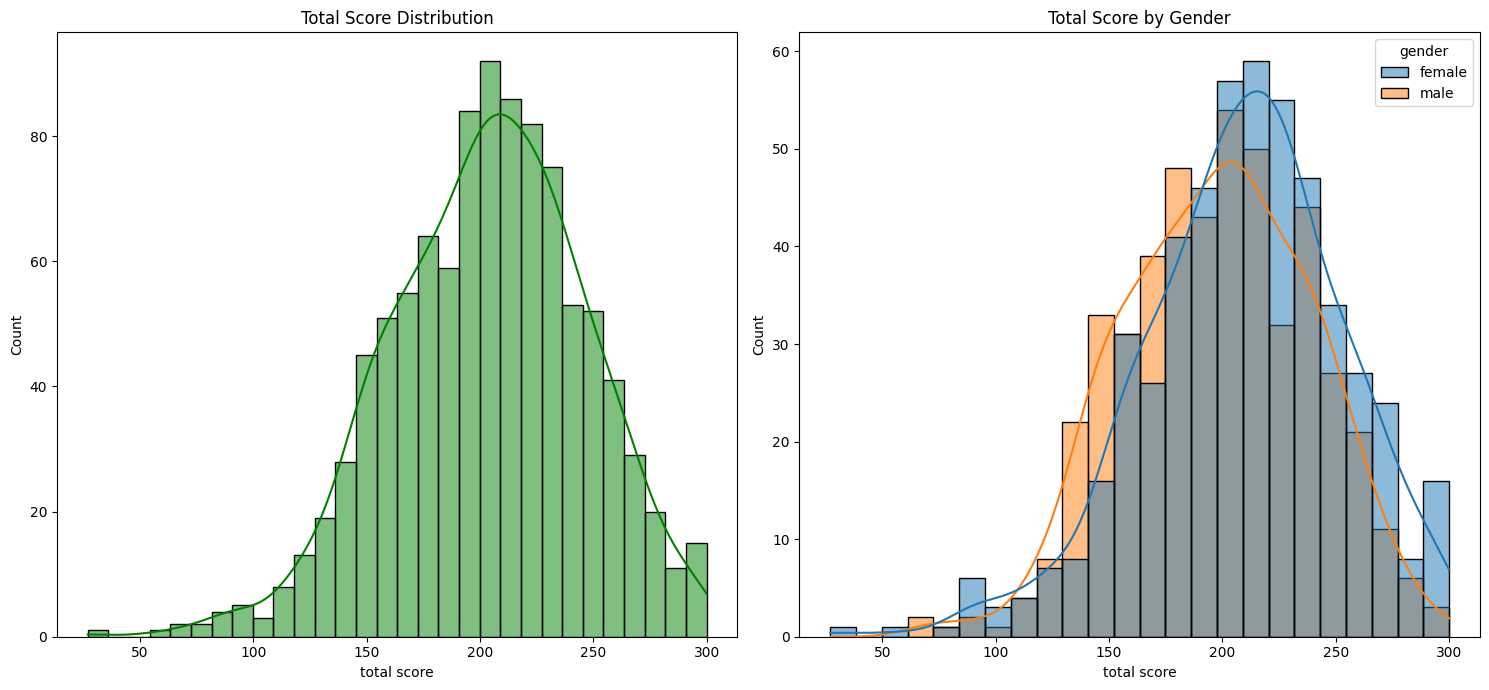

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])

plt.show()


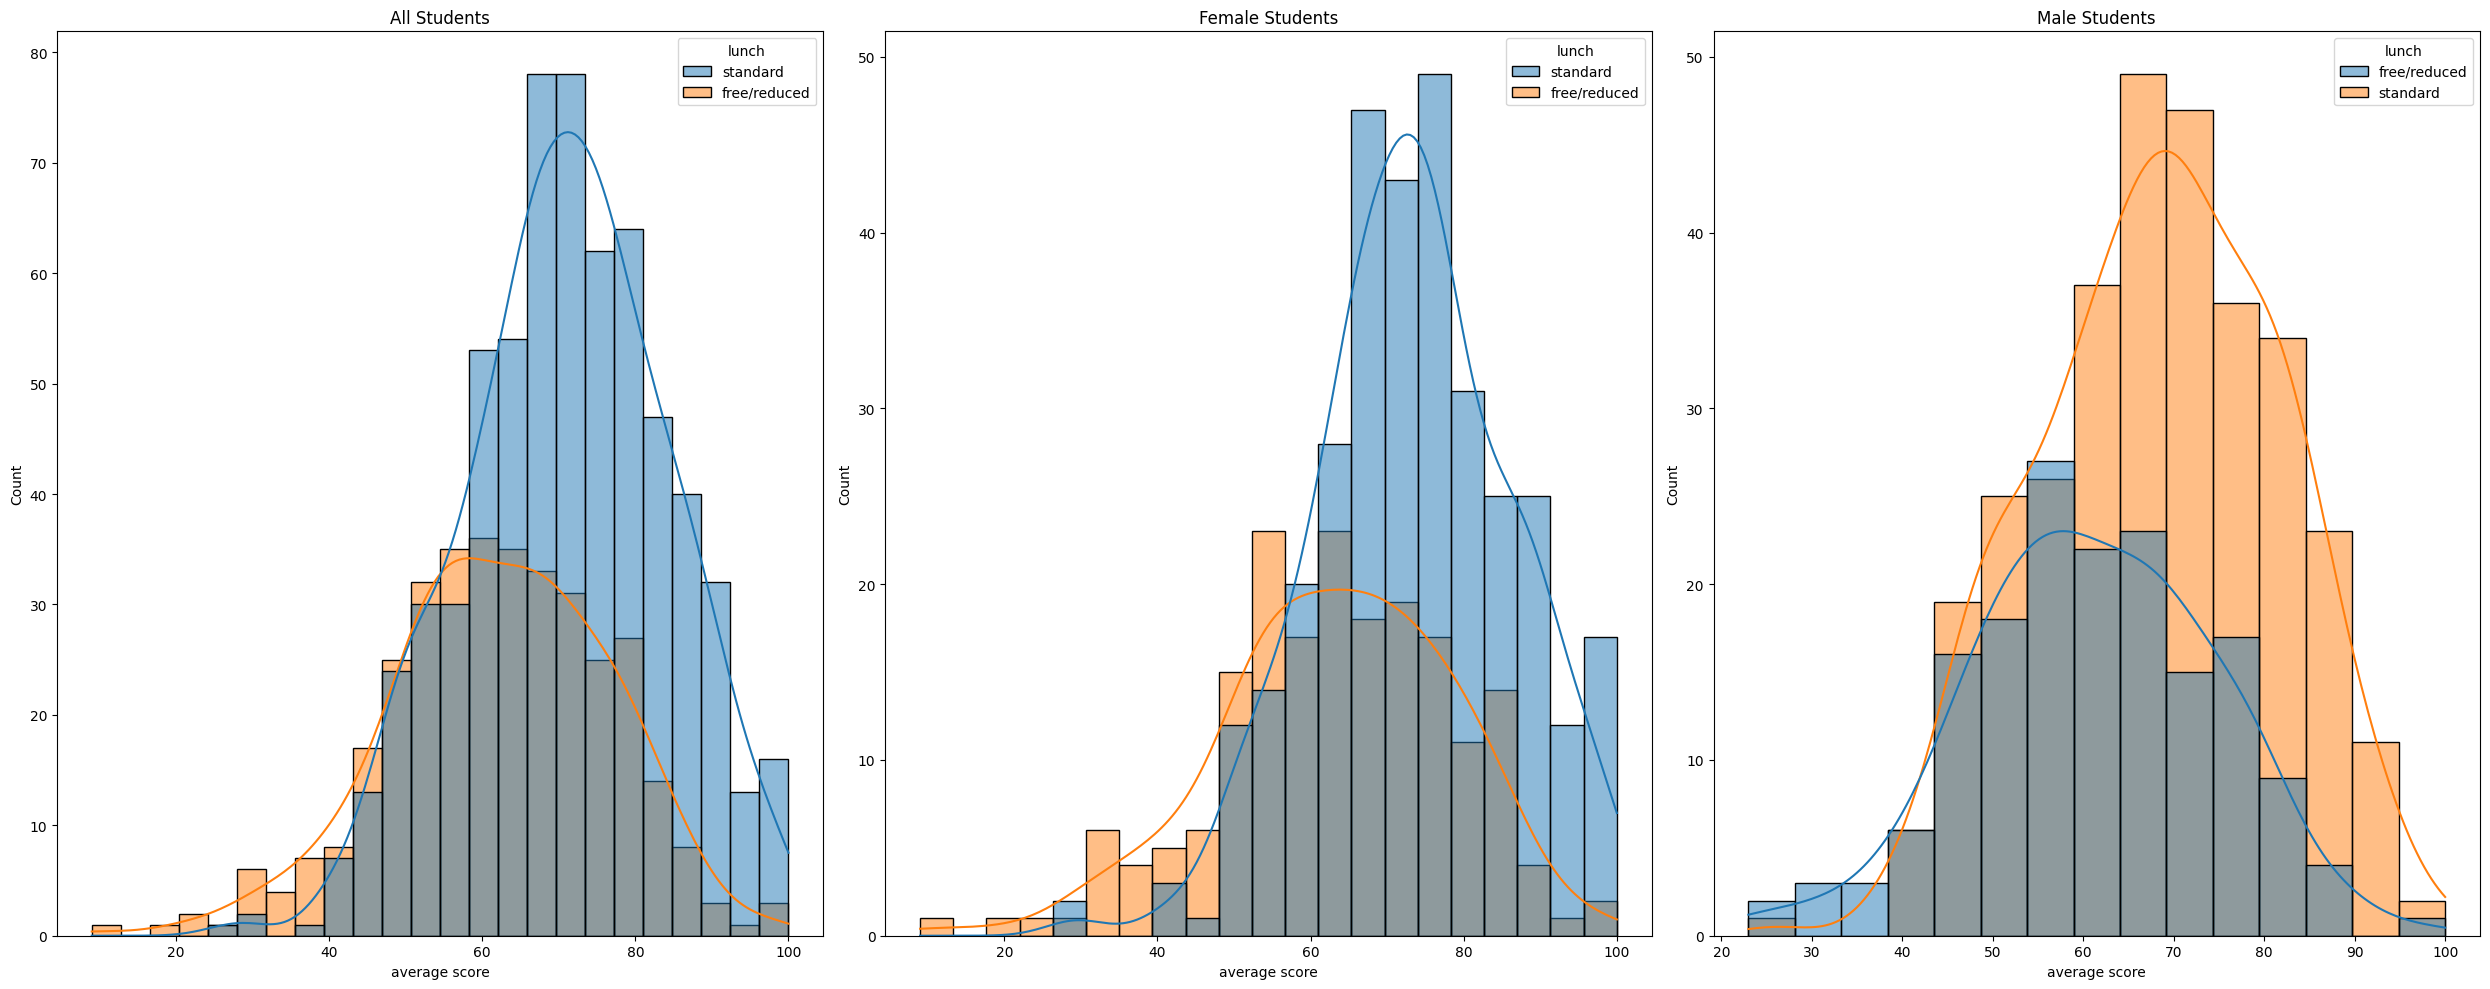

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# Plot 1: Overall
sns.histplot(data=df, x='average score', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title("All Students")

# Plot 2: Female
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title("Female Students")

# Plot 3: Male
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title("Male Students")

plt.tight_layout()
plt.show()


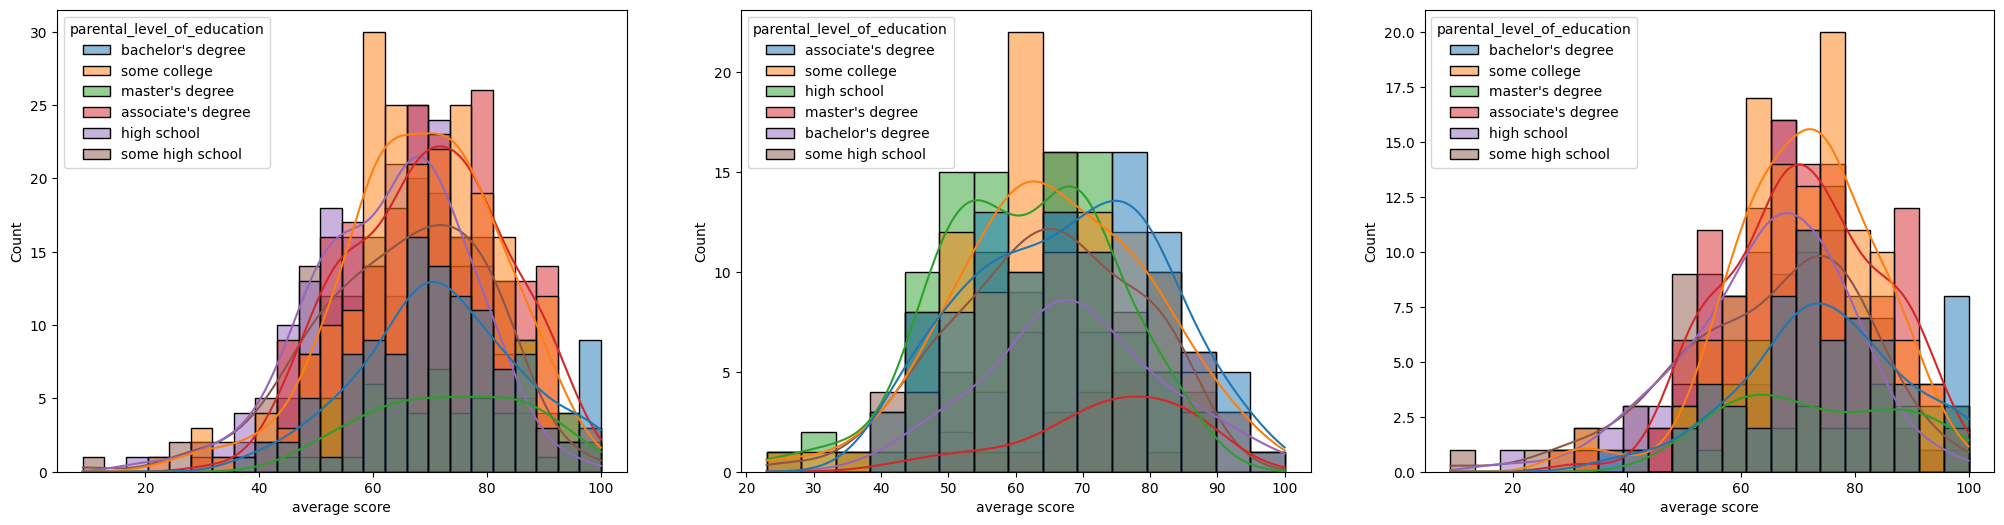

In [76]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))

sns.histplot(data = df, x='average score', kde = True, hue= 'parental_level_of_education', ax = axs[0])
sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'parental_level_of_education', ax = axs[1])
sns.histplot(data=df[df.gender=='female'], x = 'average score', kde = True, hue = 'parental_level_of_education', ax= axs[2])
plt.show()


<Axes: xlabel='average score', ylabel='Count'>

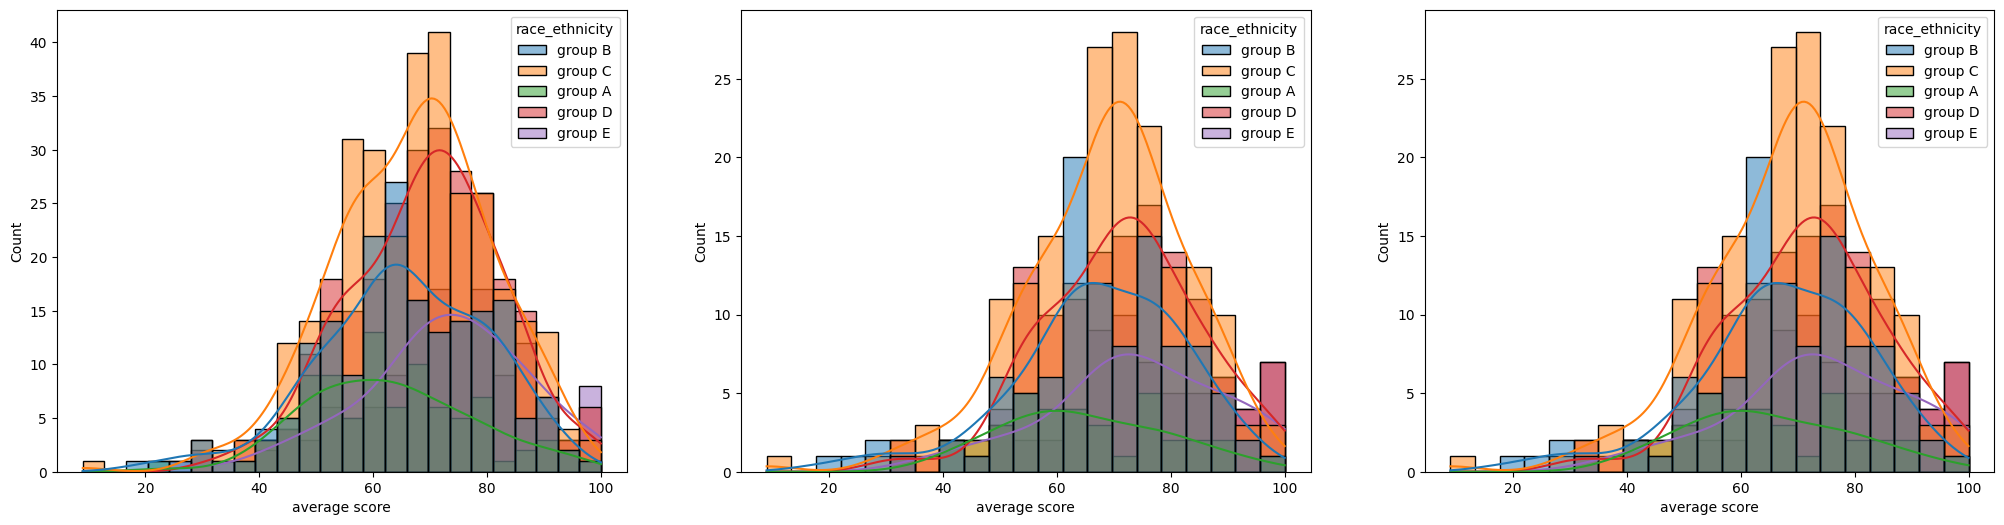

In [79]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))

sns.histplot(data = df, x = 'average score', kde = True, hue = 'race_ethnicity', ax = axs[0])
sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'race_ethnicity', ax = axs[1])
sns.histplot(data = df[df.gender=='female'], x = 'average score', kde = True, hue = 'race_ethnicity', ax =axs[2])

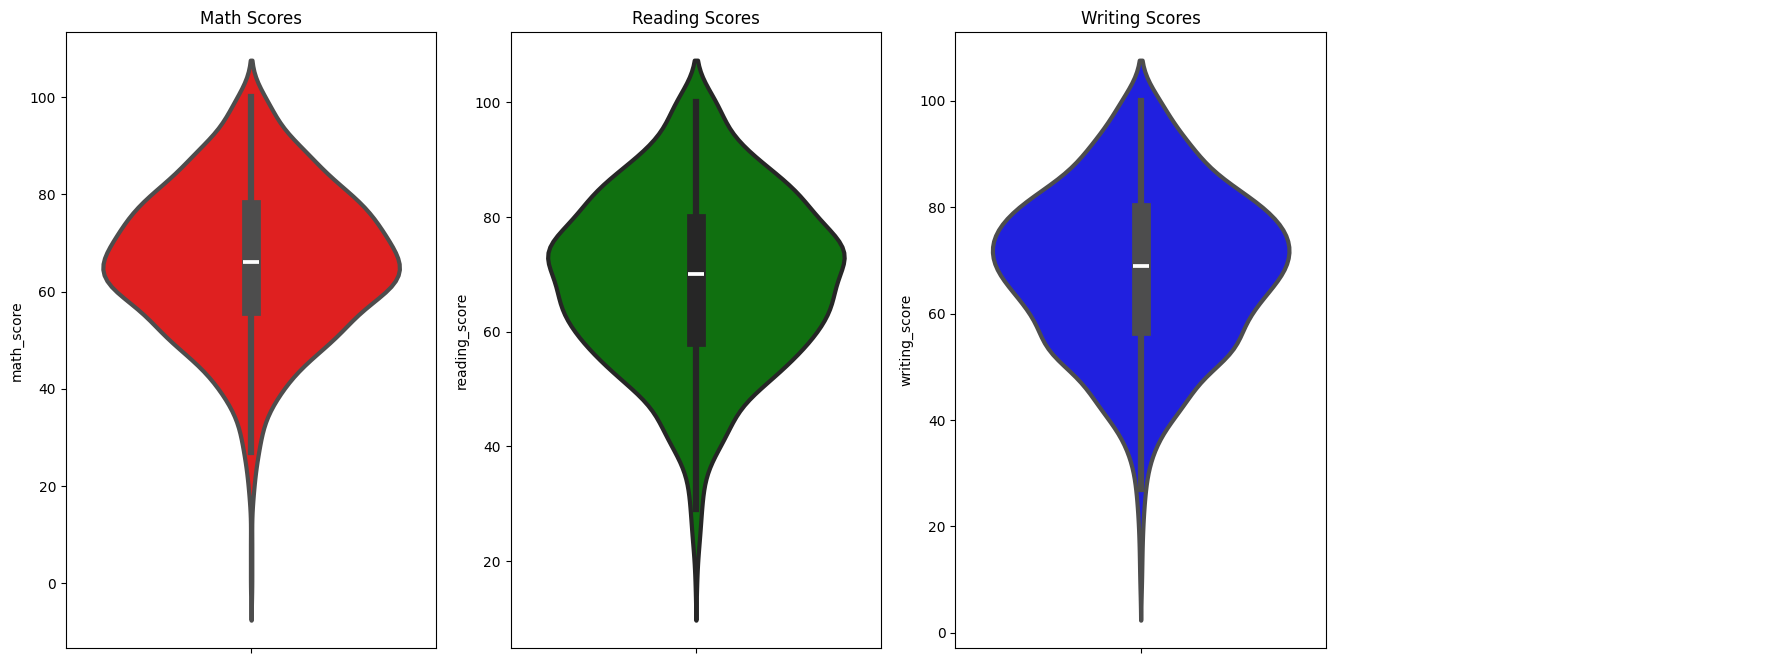

In [81]:
fig, axs = plt.subplots(1, 4, figsize=(22, 8))  # 1 row, 4 columns

# Math score
sns.violinplot(y='math_score', data=df, color='red', linewidth=3, ax=axs[0])
axs[0].set_title('Math Scores')

# Reading score
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, ax=axs[1])
axs[1].set_title('Reading Scores')

# Writing score
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, ax=axs[2])
axs[2].set_title('Writing Scores')

# Fill 4th subplot (optional)
axs[3].axis('off')  # If you don't want to plot anything

plt.show()

Multivariate analysis

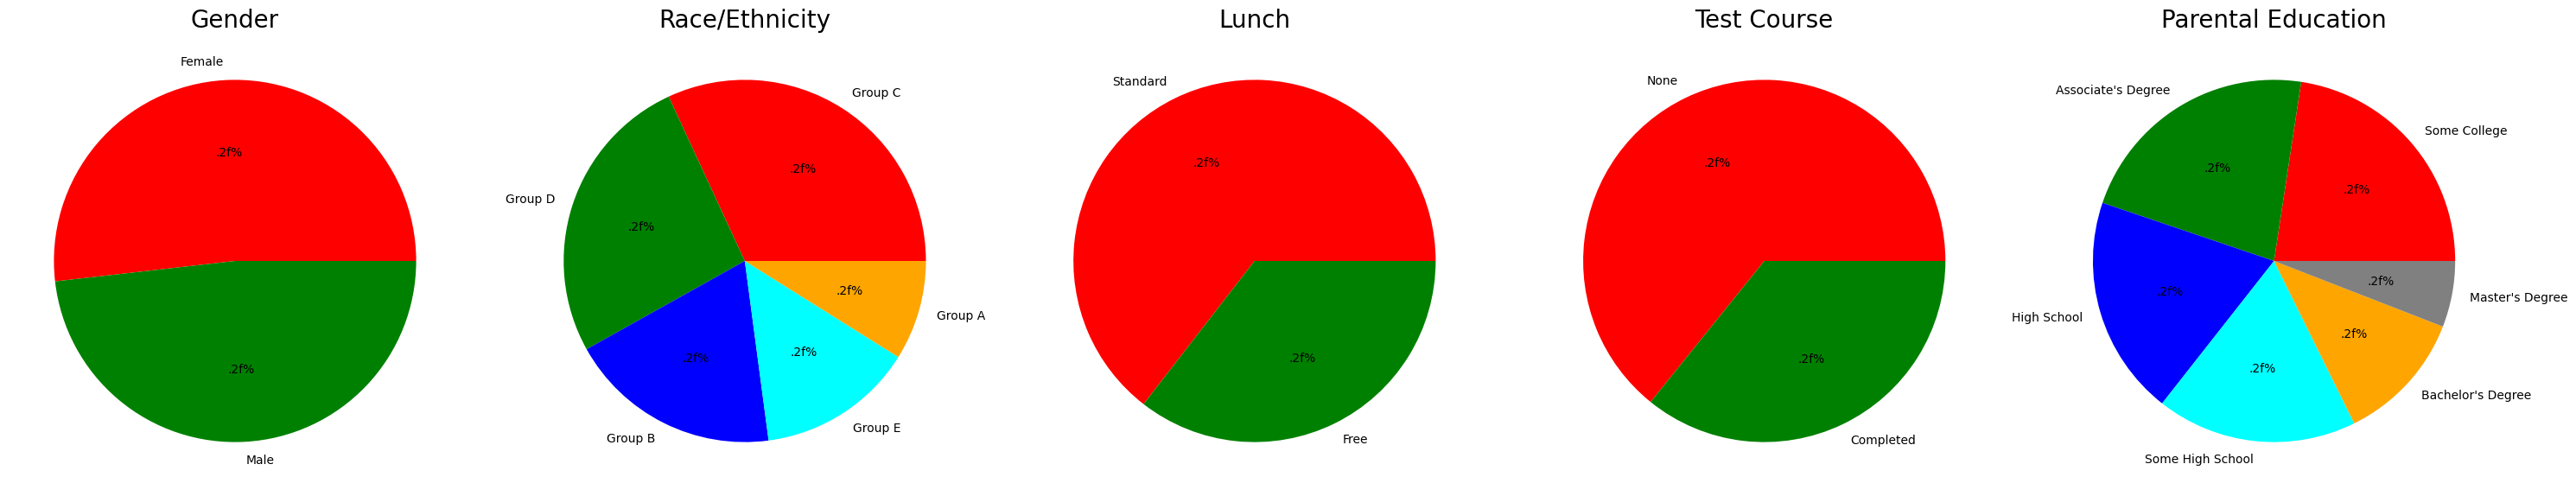

In [82]:
fig, axs = plt.subplots(1, 5, figsize=(30, 12))

# Gender
sizes = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']
axs[0].pie(sizes, labels=labels, colors=colors, autopct='.2f%%')
axs[0].set_title('Gender', fontsize=20)
axs[0].axis('off')

# Race/Ethnicity
sizes = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']
axs[1].pie(sizes, labels=labels, colors=colors, autopct='.2f%%')
axs[1].set_title('Race/Ethnicity', fontsize=20)
axs[1].axis('off')

# Lunch
sizes = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['red', 'green']
axs[2].pie(sizes, labels=labels, colors=colors, autopct='.2f%%')
axs[2].set_title('Lunch', fontsize=20)
axs[2].axis('off')

# Test preparation course
sizes = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']
axs[3].pie(sizes, labels=labels, colors=colors, autopct='.2f%%')
axs[3].set_title('Test Course', fontsize=20)
axs[3].axis('off')

# Parental level of education
sizes = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
axs[4].pie(sizes, labels=labels, colors=colors, autopct='.2f%%')
axs[4].set_title('Parental Education', fontsize=20)
axs[4].axis('off')

plt.tight_layout()
plt.show()


### Feature wise visualisation:

1. Gender

 UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

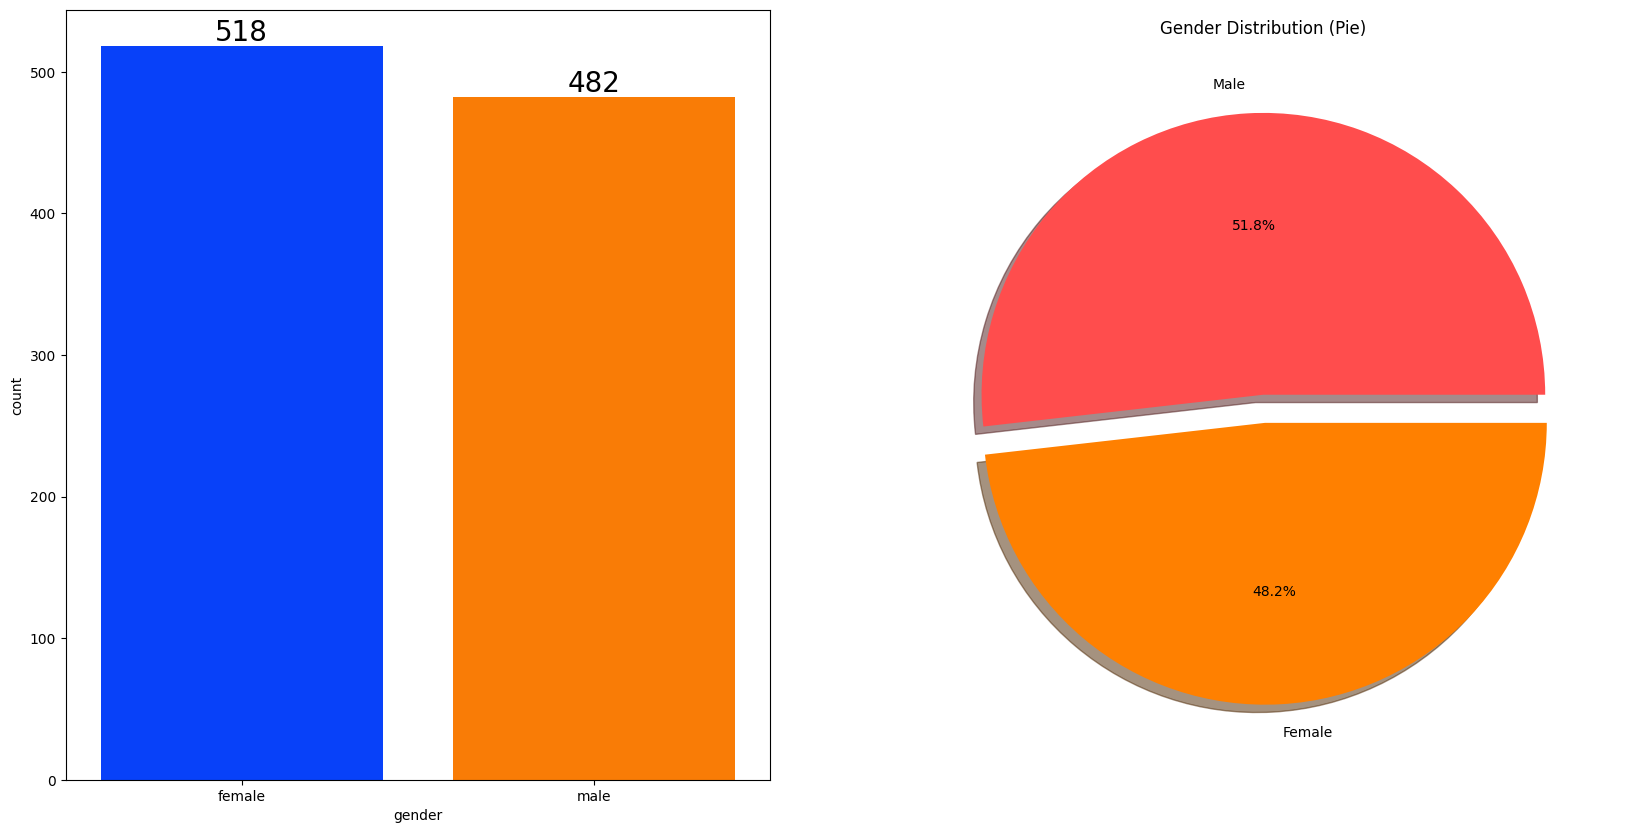

In [83]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart
ax[1].pie(
    x=df['gender'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)
ax[1].set_title("Gender Distribution (Pie)")

plt.show()


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [84]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


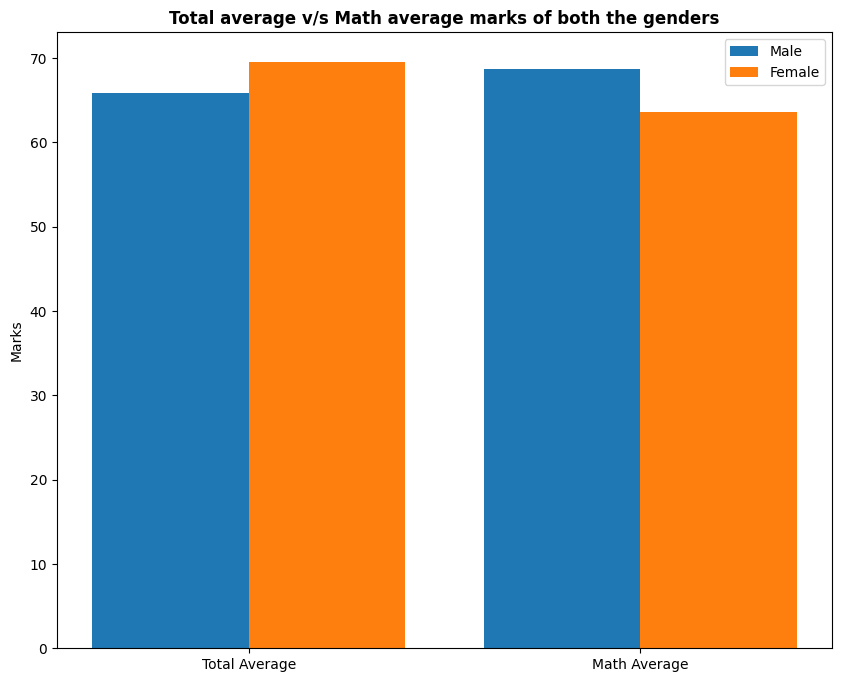

In [86]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

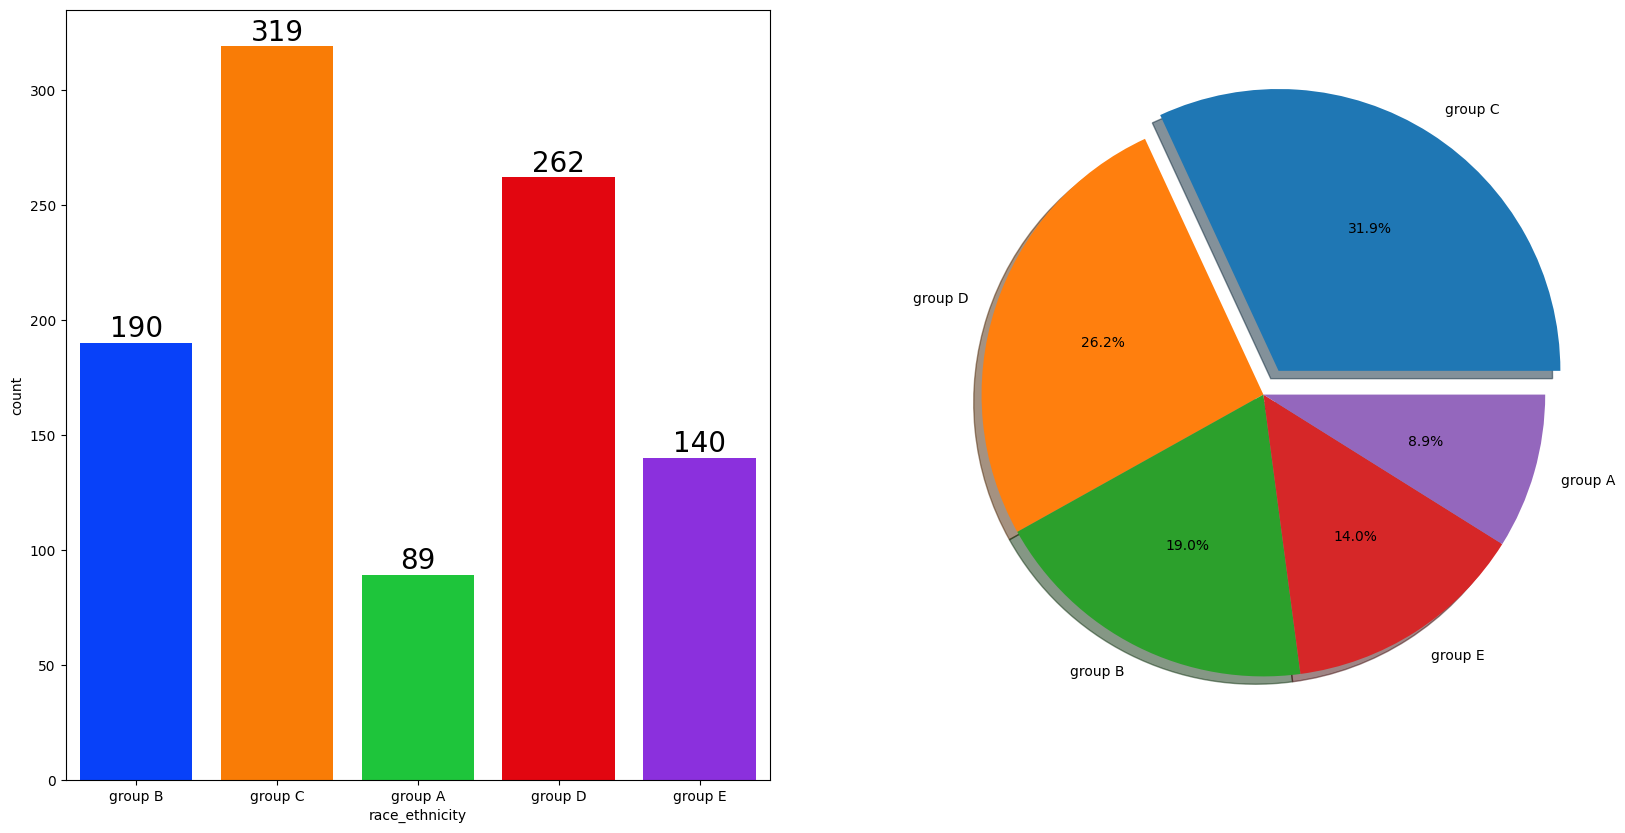

In [87]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

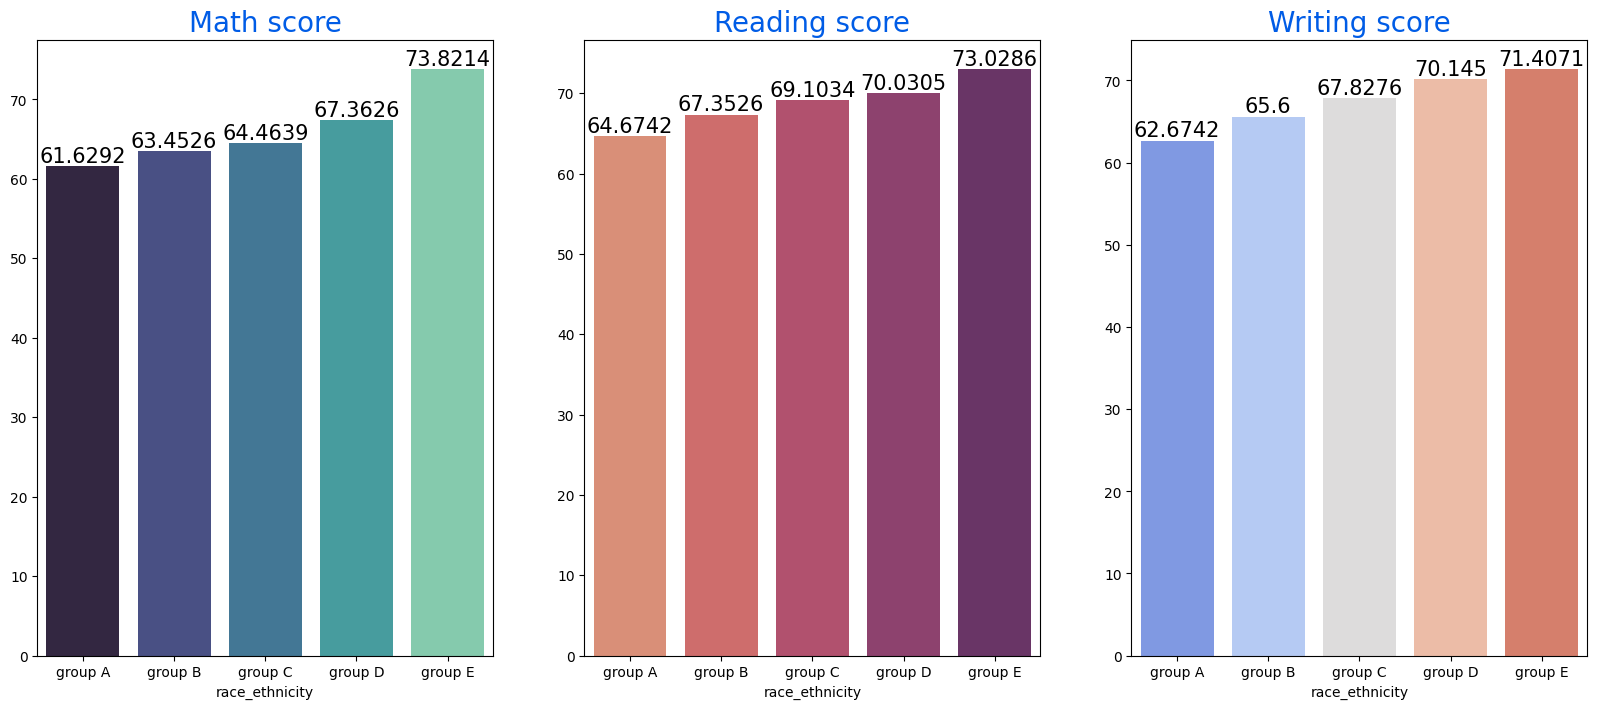

In [88]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

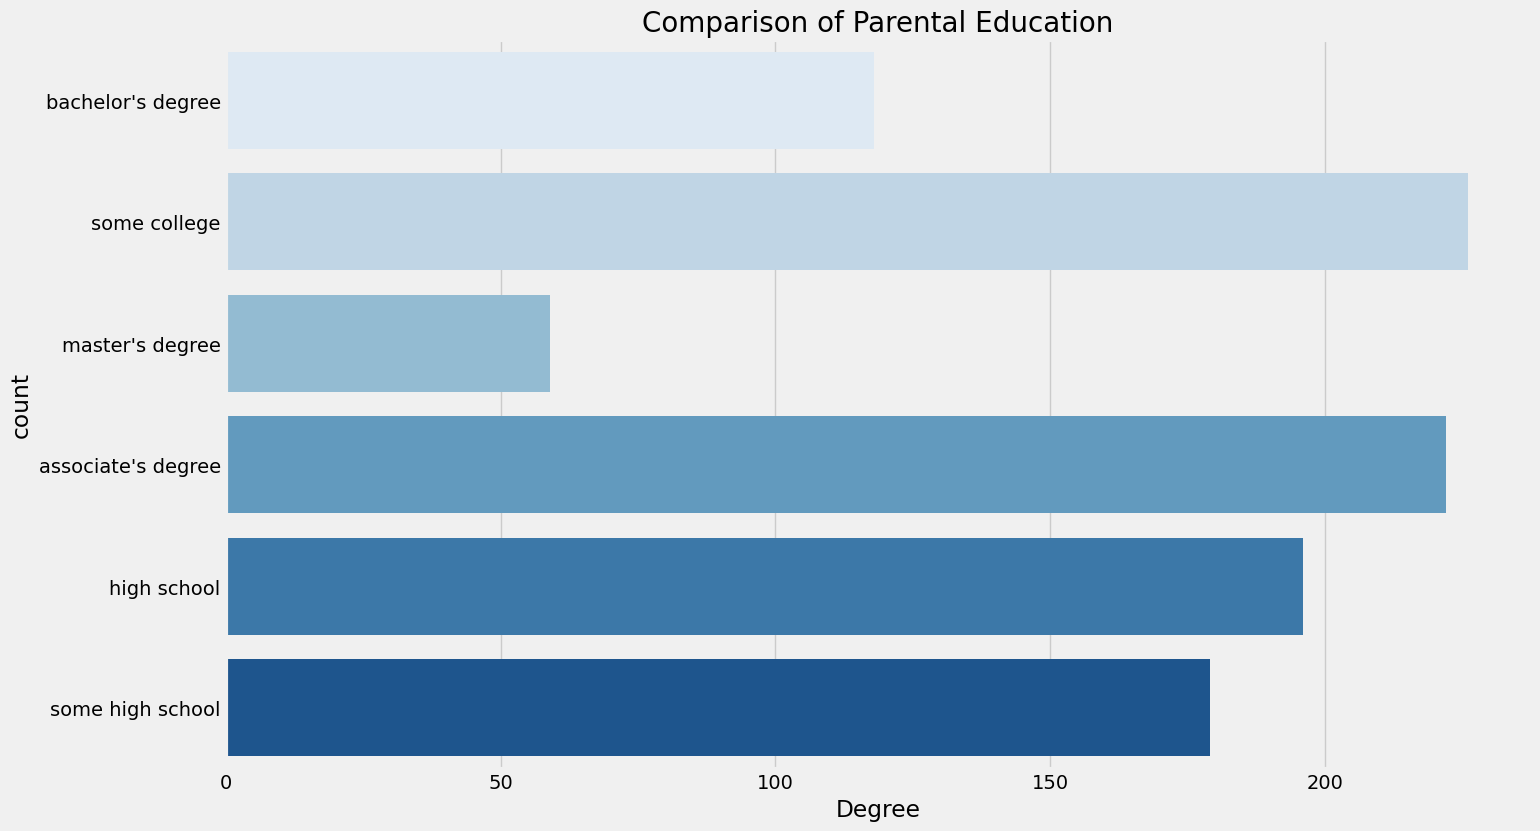

In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

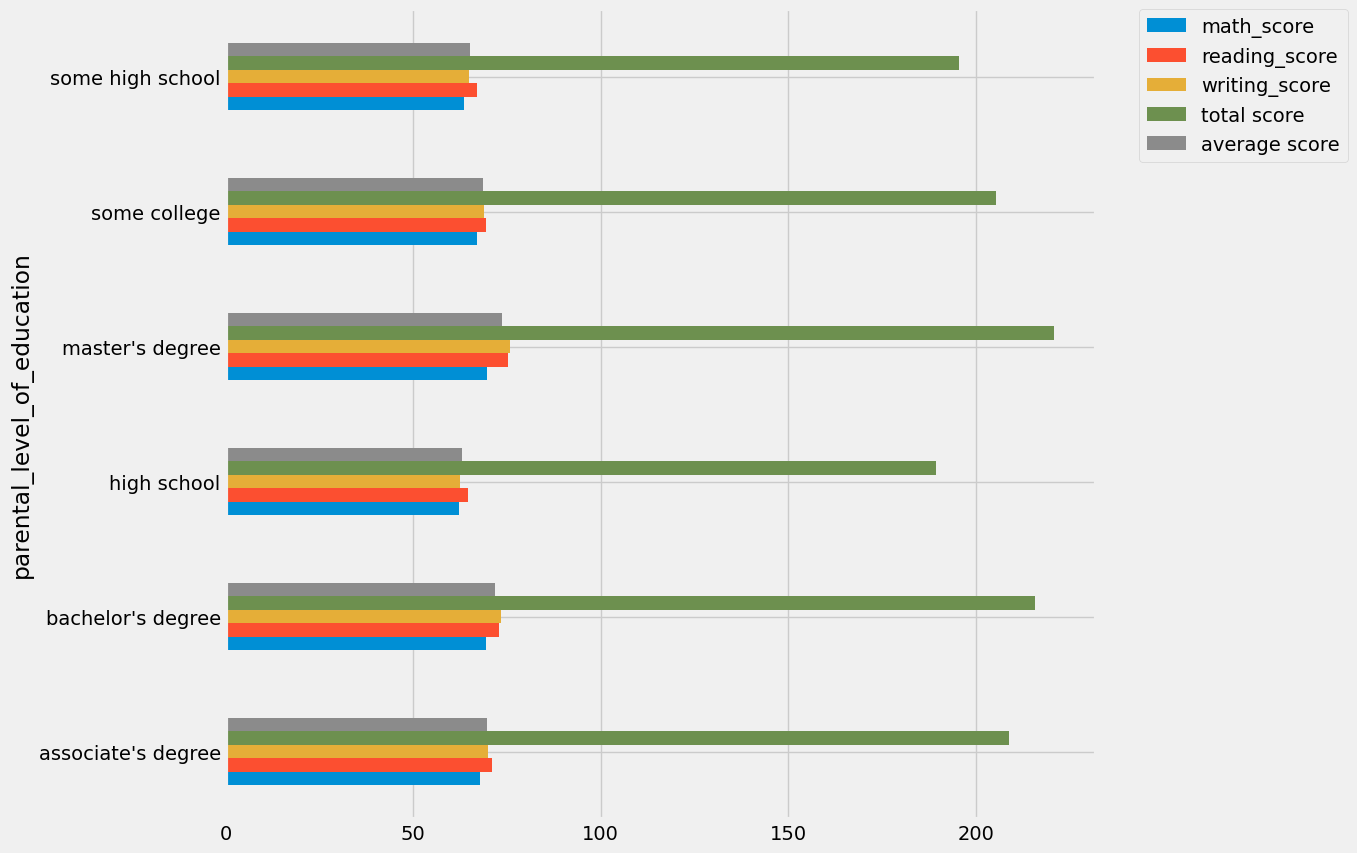

In [90]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize = (10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

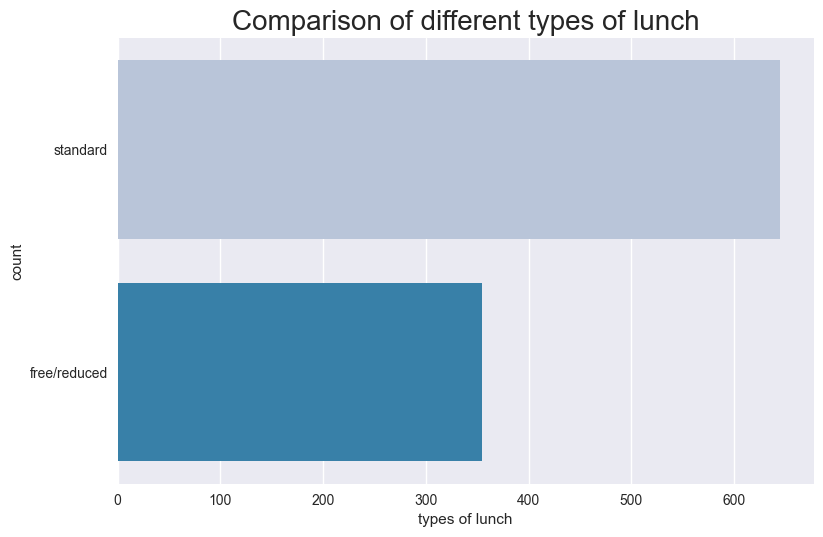

In [91]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

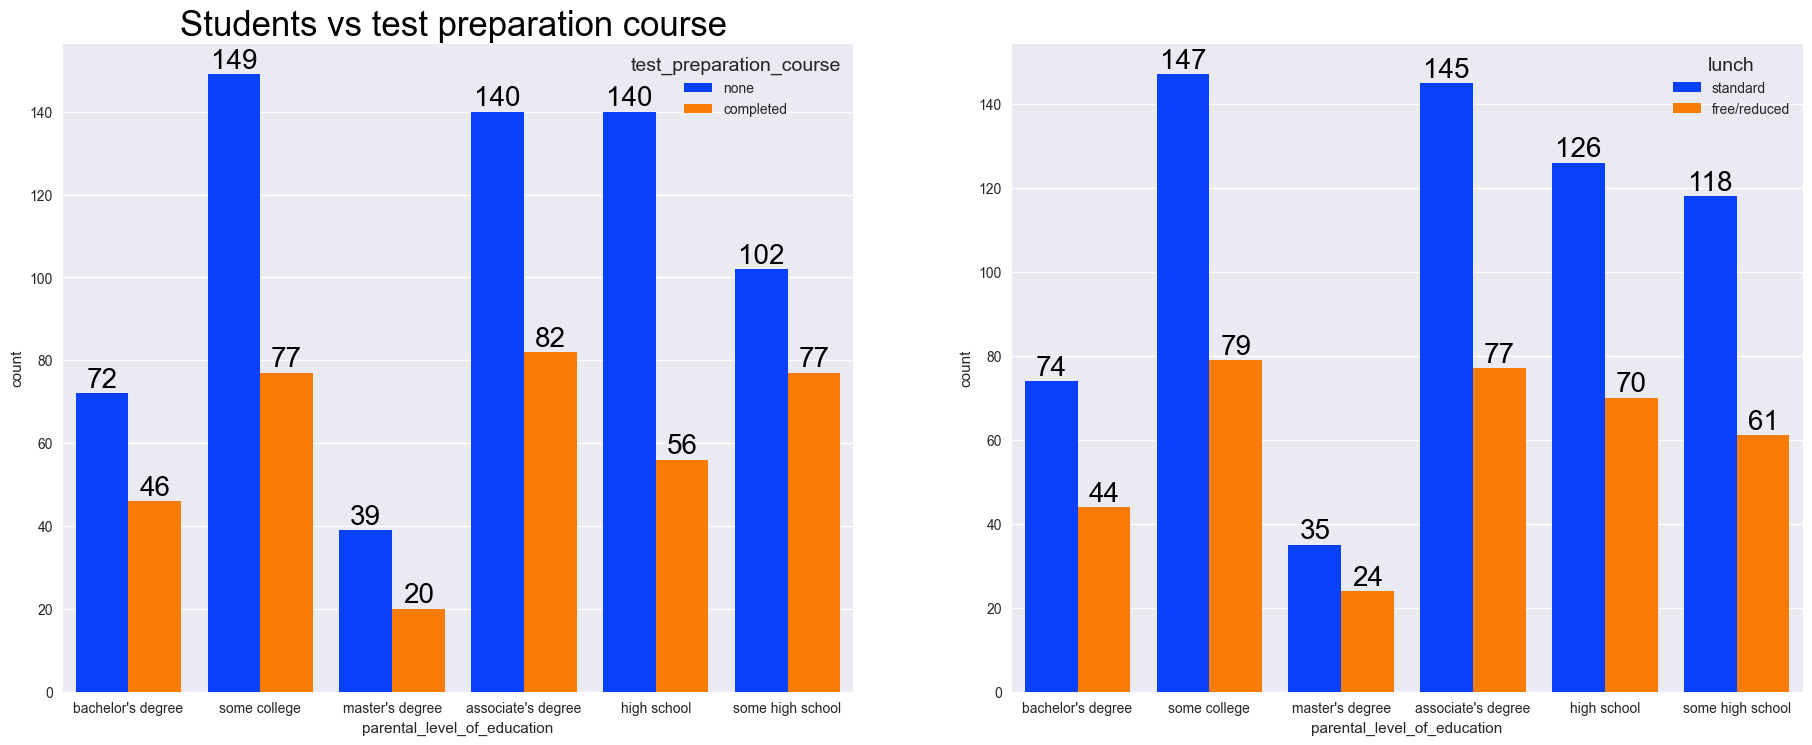

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

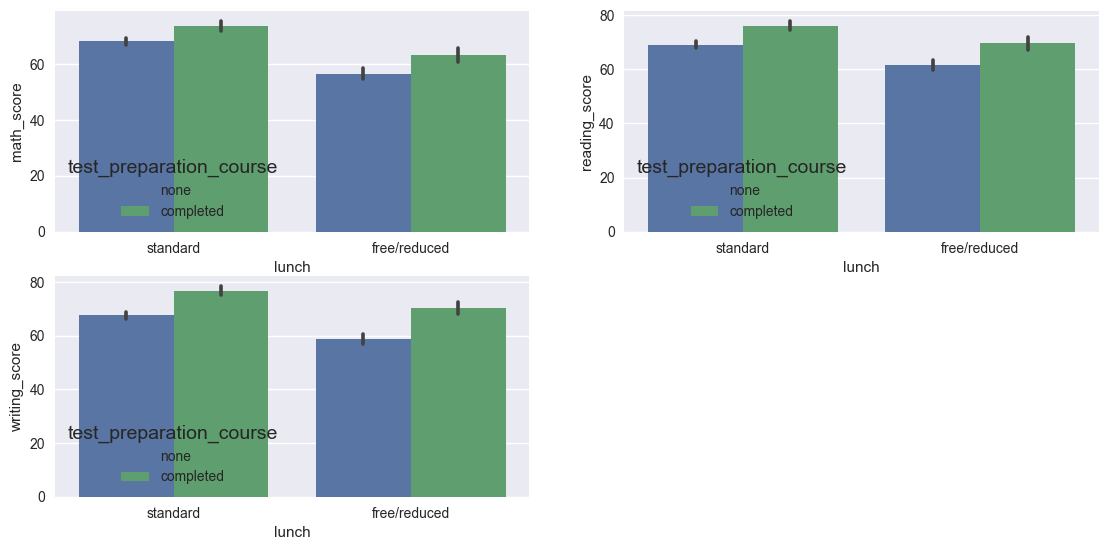

In [93]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### 4.4.6 CHECKING OUTLIERS

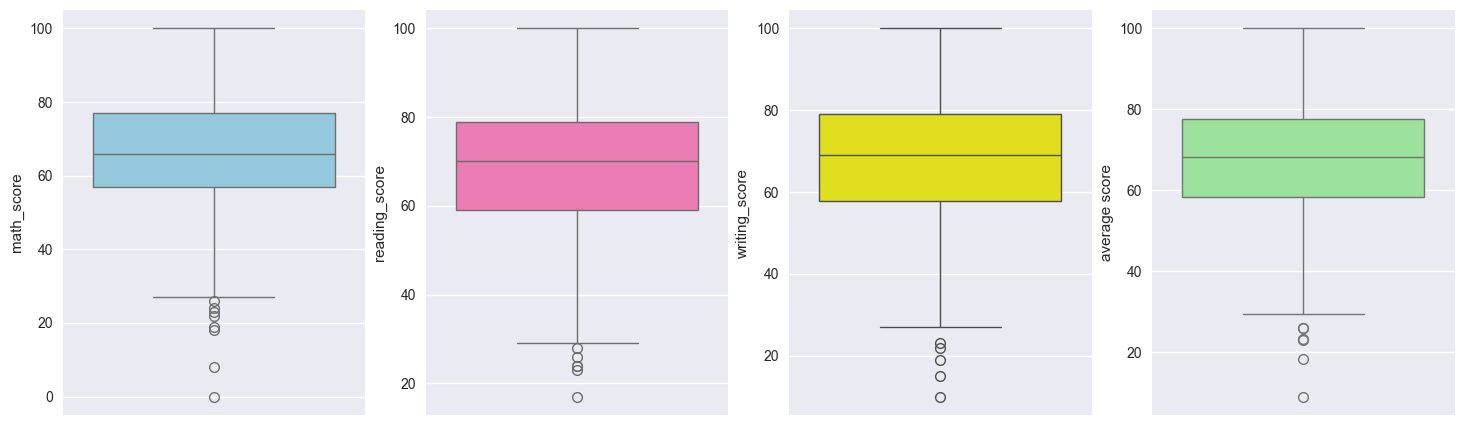

In [95]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


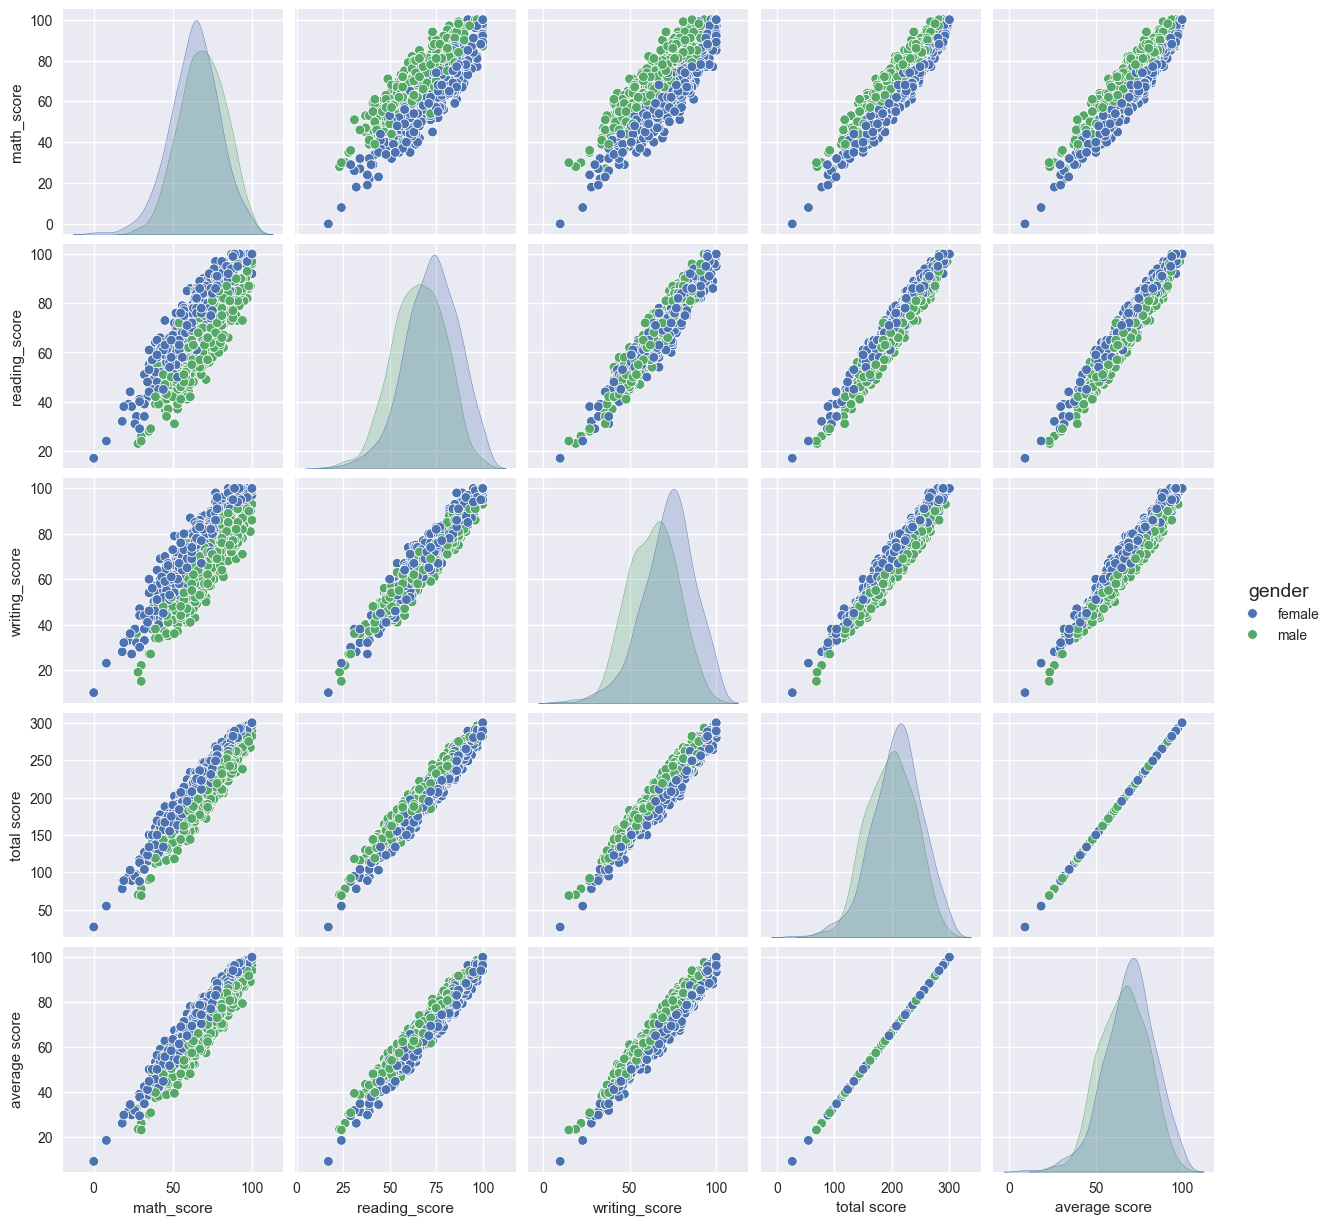

In [96]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.